## This example shows the basic usage of the ``SelfPacedEnsembleClassifier``

In [1]:
RANDOM_STATE = 42

## Preparation
First, we will import necessary packages and generate an example multi-class imbalanced dataset.

In [2]:
from self_paced_ensemble import SelfPacedEnsembleClassifier
from self_paced_ensemble.self_paced_ensemble.base import sort_dict_by_key
from self_paced_ensemble.utils._plot import plot_2Dprojection_and_cardinality

from collections import Counter
import matplotlib.pyplot as plt

from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score

Make a 5-class imbalanced classification task

Original training dataset shape {0: 103, 1: 897}
Original test dataset shape {0: 97, 1: 903}


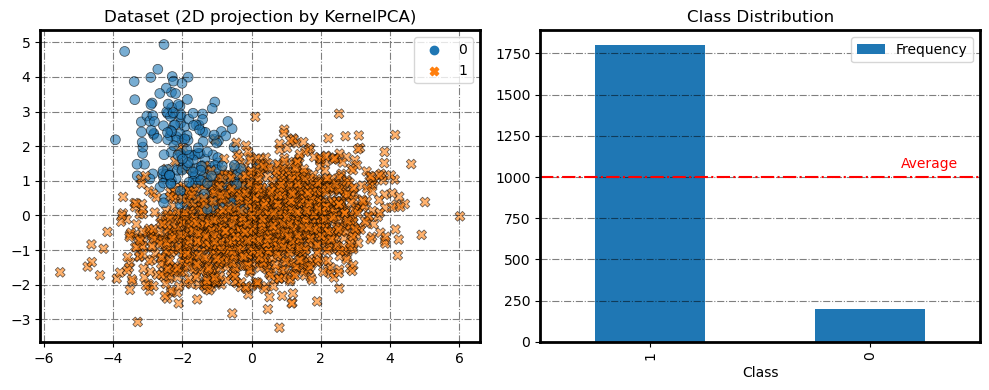

In [3]:
X, y = make_classification(n_classes=2, class_sep=1, # 3-class
    weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1, n_samples=2000, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

origin_distr = sort_dict_by_key(Counter(y_train))
test_distr = sort_dict_by_key(Counter(y_test))
print('Original training dataset shape %s' % origin_distr)
print('Original test dataset shape %s' % test_distr)

# Visualize the dataset
projection = KernelPCA(n_components=2).fit(X, y)
fig = plot_2Dprojection_and_cardinality(X, y, projection=projection)
plt.show()

# Train a SelfPacedEnsemble Classifier
Basic usage example of ``SelfPacedEnsembleClassifier``

In [4]:
# Train a SelfPacedEnsembleClassifier
clf = SelfPacedEnsembleClassifier(
    n_estimators=5,
    random_state=RANDOM_STATE,
).fit(X_train, y_train)

# Predict & Evaluate
y_pred = clf.predict(X_test)
score = average_precision_score(y_test, y_pred)
print ("SelfPacedEnsemble {} | AUPRC: {:.3f} | #Training Samples: {:d}".format(
    len(clf.estimators_), score, sum(clf.estimators_n_training_samples_)
    ))

SelfPacedEnsemble 5 | AUPRC: 0.987 | #Training Samples: 1030


Train ``SelfPacedEnsembleClassifier`` with advanced training log

In [5]:
init_kwargs = {
    'n_estimators': 50,
    'random_state': RANDOM_STATE,
}
clf = SelfPacedEnsembleClassifier(**init_kwargs).fit(
    X_train, y_train,
    train_verbose=True,   # Enable training log
)

┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             ┃                    ┃            Data: train             ┃
┃ #Estimators ┃ Class Distribution ┃               Metric               ┃
┃             ┃                    ┃  acc    balanced_acc   weighted_f1 ┃
┣━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃      1      ┃  {0: 103, 1: 103}  ┃ 0.896      0.942          0.910    ┃
┃      5      ┃  {0: 103, 1: 103}  ┃ 0.964      0.980          0.966    ┃
┃     10      ┃  {0: 103, 1: 103}  ┃ 0.978      0.988          0.979    ┃
┃     15      ┃  {0: 103, 1: 103}  ┃ 0.999      0.999          0.999    ┃
┃     20      ┃  {0: 103, 1: 103}  ┃ 0.999      0.999          0.999    ┃
┃     25      ┃  {0: 103, 1: 103}  ┃ 1.000      1.000          1.000    ┃
┃     30      ┃  {0: 103, 1: 103}  ┃ 1.000      1.000          1.000    ┃
┃     35      ┃  {0: 103, 1: 103}  ┃ 1.000      1.000          1.000    ┃
┃     40      ┃  {0: 103, 1: 103}  ┃ 1

Customizing the training log

In [6]:
clf = SelfPacedEnsembleClassifier(**init_kwargs).fit(
    X_train, y_train,
    eval_datasets={'test': (X_test, y_test)},  # Add validation dataset
    train_verbose=True,
)

┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             ┃                    ┃            Data: train             ┃             Data: test             ┃
┃ #Estimators ┃ Class Distribution ┃               Metric               ┃               Metric               ┃
┃             ┃                    ┃  acc    balanced_acc   weighted_f1 ┃  acc    balanced_acc   weighted_f1 ┃
┣━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃      1      ┃  {0: 103, 1: 103}  ┃ 0.896      0.942          0.910    ┃ 0.861      0.891          0.883    ┃
┃      5      ┃  {0: 103, 1: 103}  ┃ 0.964      0.980          0.966    ┃ 0.939      0.920          0.944    ┃
┃     10      ┃  {0: 103, 1: 103}  ┃ 0.978      0.988          0.979    ┃ 0.932      0.921          0.938    ┃
┃     15      ┃  {0: 103, 1: 103}  ┃ 0.999      0.999          0.999    ┃ 0.953      0.928          0.956    ┃
┃

In [7]:
from sklearn.metrics import balanced_accuracy_score
clf = SelfPacedEnsembleClassifier(**init_kwargs).fit(
    X_train, y_train,
    eval_datasets={'test': (X_test, y_test)},
    eval_metrics={'balanced_acc': (balanced_accuracy_score, {})},  # Customize evaluation metrics
    train_verbose=True,
)

┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃             ┃                    ┃ Data: train  ┃  Data: test  ┃
┃ #Estimators ┃ Class Distribution ┃    Metric    ┃    Metric    ┃
┃             ┃                    ┃ balanced_acc ┃ balanced_acc ┃
┣━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━┫
┃      1      ┃  {0: 103, 1: 103}  ┃    0.942     ┃    0.891     ┃
┃      5      ┃  {0: 103, 1: 103}  ┃    0.980     ┃    0.920     ┃
┃     10      ┃  {0: 103, 1: 103}  ┃    0.988     ┃    0.921     ┃
┃     15      ┃  {0: 103, 1: 103}  ┃    0.999     ┃    0.928     ┃
┃     20      ┃  {0: 103, 1: 103}  ┃    0.999     ┃    0.933     ┃
┃     25      ┃  {0: 103, 1: 103}  ┃    1.000     ┃    0.927     ┃
┃     30      ┃  {0: 103, 1: 103}  ┃    1.000     ┃    0.924     ┃
┃     35      ┃  {0: 103, 1: 103}  ┃    1.000     ┃    0.927     ┃
┃     40      ┃  {0: 103, 1: 103}  ┃    1.000     ┃    0.931     ┃
┃     45      ┃  {0: 103, 1: 103}  ┃    1.000     ┃    0.932  

## Please refer to the [Documentation](https://imbalanced-ensemble.readthedocs.io/en/latest/api/ensemble/_autosummary/imbalanced_ensemble.ensemble.under_sampling.SelfPacedEnsembleClassifier.html) for more details.